## EMD

In [ ]:
from PyEMD import EMD
import numpy  as np
import pylab as plt

# Define signal
t = np.linspace(0, 1, 200)
s = np.cos(11*2*np.pi*t*t) + 6*t*t

# Execute EMD on signal
IMF = EMD().emd(s,t)
N = IMF.shape[0]+1

# Plot results
plt.subplot(N,1,1)
plt.plot(t, s, 'r')
plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
plt.xlabel("Time [s]")

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")

plt.tight_layout()
plt.savefig('simple_example')
plt.show()

# EEMD

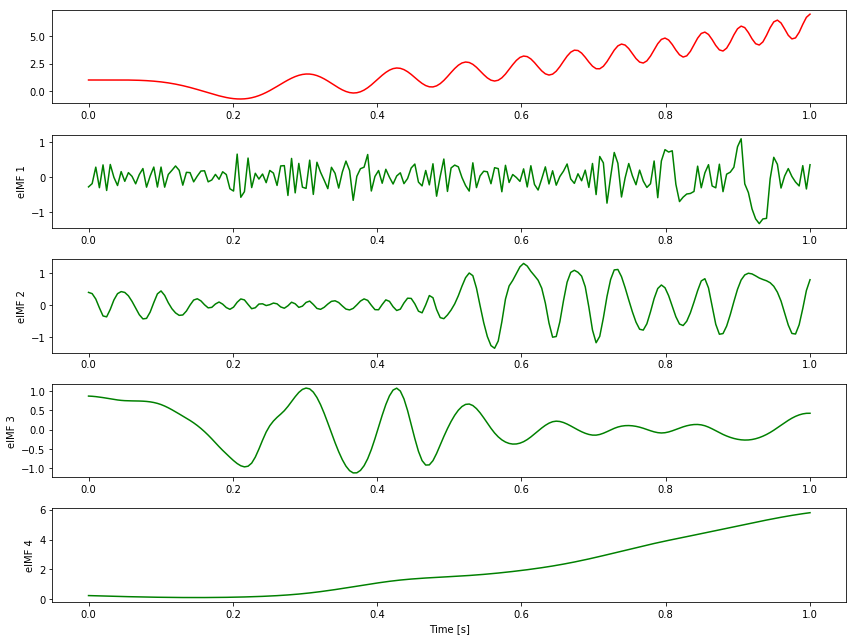

In [2]:
from PyEMD import EMD
import numpy  as np
import pylab as plt
from PyEMD import EEMD
import numpy as np

# Define signal
t = np.linspace(0, 1, 200)

S=np.cos(11*2*np.pi*t*t) + 6*t*t

# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

# CEEMDAN

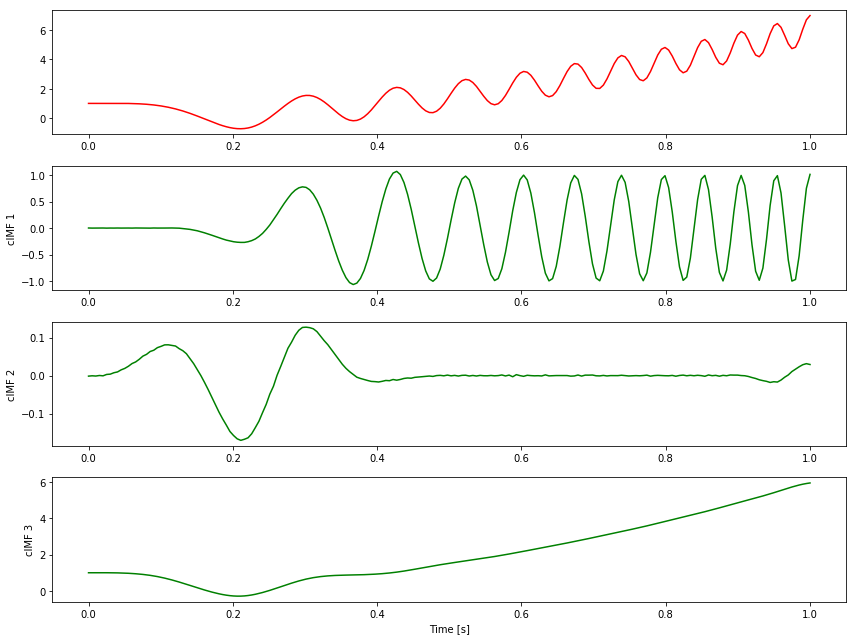

In [3]:
from PyEMD import EMD
import numpy  as np
import pylab as plt
from PyEMD import CEEMDAN
import numpy as np
# Define signal
t = np.linspace(0, 1, 200)

S=np.cos(11*2*np.pi*t*t) + 6*t*t

ceemdan = CEEMDAN()


cIMFs = ceemdan.ceemdan(S,t)
nIMFs = cIMFs.shape[0]

plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, cIMFs[n], 'g')
    plt.ylabel("cIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('ceemdn_example', dpi=120)
plt.show()


## 一、读取数据集

In [2]:
from scipy.io import loadmat
import numpy as np
import os
path = r'C:\Users\lenovo\Desktop\毕业设计\西储大学轴承数据中心网站\12k Drive End Bearing Fault data' 
filenames = os.listdir(path)
def capture(path):
    files = {}
    for i in filenames:
        # 文件路径
        file_path = os.path.join(path, i)
        file = loadmat(file_path)
        file_keys = file.keys()
        for key in file_keys:
            if 'DE' in key:
                files[i] = file[key].ravel()
    return files
path = r'C:\Users\lenovo\Desktop\毕业设计\西储大学轴承数据中心网站\12k Drive End Bearing Fault data'


{'105.mat': array([-0.08300435, -0.19573433,  0.23341928, ..., -0.31642363,
        -0.06367457,  0.26736822]),
 '106.mat': array([-0.27760164, -0.04434479,  0.11760303, ...,  0.17234367,
         0.12263852,  0.01884248]),
 '107.mat': array([-0.09323776,  0.1872877 ,  0.21766307, ...,  0.06562379,
        -0.184039  , -0.04044635]),
 '108.mat': array([ 0.22269856,  0.09323776, -0.14651649, ..., -0.36125573,
         0.31138814,  0.17055689]),
 '118.mat': array([-0.0027614 , -0.09632403,  0.11370459, ..., -0.07829373,
        -0.14911545,  0.02111657]),
 '119.mat': array([-0.0721212 ,  0.30310395,  0.03313677, ...,  0.08820228,
        -0.19687138, -0.03898443]),
 '120.mat': array([-0.31447441,  0.12198878,  0.39146866, ...,  0.01900491,
         0.21067836,  0.0568523 ]),
 '121.mat': array([ 0.09031393,  0.22497265, -0.10883154, ...,  0.02858858,
        -0.15934886, -0.01835517]),
 '130.mat': array([ 0.00852784,  0.4235496 ,  0.01299481, ...,  0.17583603,
         0.1100498 , -0.1027

## 二、画出振动信号的时域图和频域图

<Figure size 576x288 with 0 Axes>

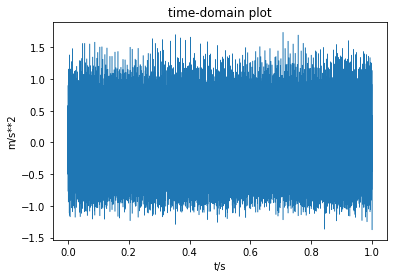

<Figure size 576x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
data = capture(path)
y_axis = []
x_axis = []
for i in data.get('105.mat'):
    y_axis.append(i)
for j in np.linspace(0, 1, 121265):
    x_axis.append(j)

## 绘制时域图
plt.title('time-domain plot')
plt.plot(x_axis,y_axis,linewidth=0.5)
plt.xlabel('t/s')
plt.ylabel('m/s**2')
plt.figure(figsize=(8,4))




In [4]:
##绘制频域图
sampling_rate = 100 #采样率
fft_size = 100  #FFT长度
t = np.arange(0, 1.0, 1.0/sampling_rate)

xs = x_axis[:fft_size]
  
xf = np.fft.rfft(xs) / fft_size #返回fft_size/2+1 个频率
  
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1) #表示频率
xfp = np.abs(xf) * 2 #代表信号的幅值，即振幅


E:\Anaconda\install\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


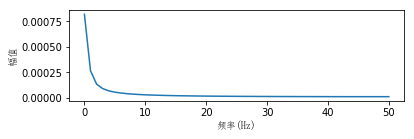

In [5]:
plt.subplot(212)
plt.plot(freqs, xfp)
plt.xlabel(u"频率(Hz)", fontproperties='FangSong')
plt.ylabel(u'幅值', fontproperties='FangSong')
plt.subplots_adjust(hspace=0.4)
plt.show()
  

## 将数据进行CEEMDAN分解

In [ ]:
from PyEMD import EMD
import numpy  as np
import pylab as plt
from PyEMD import CEEMDAN
import numpy as np

t = np.linspace(0, 1, 121265)

S=y_axis

ceemdan = CEEMDAN()


cIMFs = ceemdan.ceemdan(S,t)
nIMFs = cIMFs.shape[0]

plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, cIMFs[n], 'g')
    plt.ylabel("cIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('ceemdn_example', dpi=120)
plt.show()


## 数据进行预处理

In [ ]:
from scipy.io import loadmat

import numpy as np

import os

from sklearn import preprocessing  # 0-1编码

from sklearn.model_selection import StratifiedShuffleSplit  # 随机划分，保证每一类比例相同



def prepro(d_path, length=864, number=1000, normal=True, rate=[0.7, 0.2, 0.1], enc=True, enc_step=28):

    """对数据进行预处理,返回train_X, train_Y, valid_X, valid_Y, test_X, test_Y样本.



    :param d_path: 源数据地址

    :param length: 信号长度，默认2个信号周期，864

    :param number: 每种信号个数,总共4类,默认每个类别1000个数据

    :param normal: 是否标准化.True,Fales.默认True

    :param rate: 训练集/验证集/测试集比例.默认[0.5,0.25,0.25],相加要等于1

    :param enc: 训练集、验证集是否采用数据增强.Bool,默认True

    :param enc_step: 增强数据集采样顺延间隔

    :return: Train_X, Train_Y, Valid_X, Valid_Y, Test_X, Test_Y



    ```

    import preprocess.preprocess_nonoise as pre



    train_X, train_Y, valid_X, valid_Y, test_X, test_Y = pre.prepro(d_path=path,

                                                                    length=864,

                                                                    number=1000,

                                                                    normal=False,

                                                                    rate=[0.5, 0.25, 0.25],

                                                                    enc=True,

                                                                    enc_step=28)

    ```

    """

    # 获得该文件夹下所有.mat文件名

    filenames = os.listdir(d_path)



    def capture(original_path):

        """读取mat文件，返回字典



        :param original_path: 读取路径

        :return: 数据字典

        """

        files = {}

        for i in filenames:

            # 文件路径

            file_path = os.path.join(d_path, i)

            file = loadmat(file_path)

            file_keys = file.keys()

            for key in file_keys:

                if 'DE' in key:

                    files[i] = file[key].ravel()

        return files



    def slice_enc(data, slice_rate=rate[1] + rate[2]):

        """将数据切分为前面多少比例，后面多少比例.



        :param data: 单挑数据

        :param slice_rate: 验证集以及测试集所占的比例

        :return: 切分好的数据

        """

        keys = data.keys()

        Train_Samples = {}

        Test_Samples = {}

        for i in keys:

            slice_data = data[i]

            all_lenght = len(slice_data)

            end_index = int(all_lenght * (1 - slice_rate))

            samp_train = int(number * (1 - slice_rate))  # 700

            Train_sample = []

            Test_Sample = []

            if enc:

                enc_time = length // enc_step

                samp_step = 0  # 用来计数Train采样次数

                for j in range(samp_train):

                    random_start = np.random.randint(low=0, high=(end_index - 2 * length))

                    label = 0

                    for h in range(enc_time):

                        samp_step += 1

                        random_start += enc_step

                        sample = slice_data[random_start: random_start + length]

                        Train_sample.append(sample)

                        if samp_step == samp_train:

                            label = 1

                            break

                    if label:

                        break

            else:

                for j in range(samp_train):

                    random_start = np.random.randint(low=0, high=(end_index - length))

                    sample = slice_data[random_start:random_start + length]

                    Train_sample.append(sample)



            # 抓取测试数据

            for h in range(number - samp_train):

                random_start = np.random.randint(low=end_index, high=(all_lenght - length))

                sample = slice_data[random_start:random_start + length]

                Test_Sample.append(sample)

            Train_Samples[i] = Train_sample

            Test_Samples[i] = Test_Sample

        return Train_Samples, Test_Samples



    # 仅抽样完成，打标签

    def add_labels(train_test):

        X = []

        Y = []

        label = 0

        for i in filenames:

            x = train_test[i]

            X += x

            lenx = len(x)

            Y += [label] * lenx

            label += 1

        return X, Y



    # one-hot编码

    def one_hot(Train_Y, Test_Y):

        Train_Y = np.array(Train_Y).reshape([-1, 1])

        Test_Y = np.array(Test_Y).reshape([-1, 1])

        Encoder = preprocessing.OneHotEncoder()

        Encoder.fit(Train_Y)

        Train_Y = Encoder.transform(Train_Y).toarray()

        Test_Y = Encoder.transform(Test_Y).toarray()

        Train_Y = np.asarray(Train_Y, dtype=np.int32)

        Test_Y = np.asarray(Test_Y, dtype=np.int32)

        return Train_Y, Test_Y



    def scalar_stand(Train_X, Test_X):

        # 用训练集标准差标准化训练集以及测试集

        scalar = preprocessing.StandardScaler().fit(Train_X)

        Train_X = scalar.transform(Train_X)

        Test_X = scalar.transform(Test_X)

        return Train_X, Test_X



    def valid_test_slice(Test_X, Test_Y):

        test_size = rate[2] / (rate[1] + rate[2])

        ss = StratifiedShuffleSplit(n_splits=1, test_size=test_size)

        for train_index, test_index in ss.split(Test_X, Test_Y):

            X_valid, X_test = Test_X[train_index], Test_X[test_index]

            Y_valid, Y_test = Test_Y[train_index], Test_Y[test_index]

            return X_valid, Y_valid, X_test, Y_test



    # 从所有.mat文件中读取出数据的字典

    data = capture(original_path=d_path)

    # 将数据切分为训练集、测试集

    train, test = slice_enc(data)

    # 为训练集制作标签，返回X，Y

    Train_X, Train_Y = add_labels(train)

    # 为测试集制作标签，返回X，Y

    Test_X, Test_Y = add_labels(test)

    # 为训练集Y/测试集One-hot标签

    Train_Y, Test_Y = one_hot(Train_Y, Test_Y)

    # 训练数据/测试数据 是否标准化.

    if normal:

        Train_X, Test_X = scalar_stand(Train_X, Test_X)

    else:

        # 需要做一个数据转换，转换成np格式.

        Train_X = np.asarray(Train_X)

        Test_X = np.asarray(Test_X)

    # 将测试集切分为验证集合和测试集.

    Valid_X, Valid_Y, Test_X, Test_Y = valid_test_slice(Test_X, Test_Y)

    return Train_X, Train_Y, Valid_X, Valid_Y, Test_X, Test_Y





if __name__ == "__main__":

    path = r'C:\Users\lenovo\Desktop\毕业设计\西储大学轴承数据中心网站\12k Drive End Bearing Fault data'

   
    train_X, train_Y, valid_X, valid_Y, test_X, test_Y = prepro(d_path=path,

                                                                length=864,

                                                                number=1000,

                                                                normal=False,

                                                                rate=[0.5, 0.25, 0.25],

                                                                enc=False,

                                                                enc_step=28)

In [ ]:
print(train_X)